In [96]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [97]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
# Cargamos las librerías necesarias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Cargamos datos con SQR
perfiles_sqr = pd.read_parquet('../data/processed/perfiles_sqr_filtrado.parquet')

In [100]:
perfiles_sqr['IMC'] = perfiles_sqr['peso'] / (perfiles_sqr['altura']/100)**2
perfiles_sqr['IMC_cat'] = pd.cut(perfiles_sqr['IMC'], bins=[0, 25, 30, 50],
                                include_lowest=True,labels=['Bajo peso', 'Normal', 'Sobrepeso'])

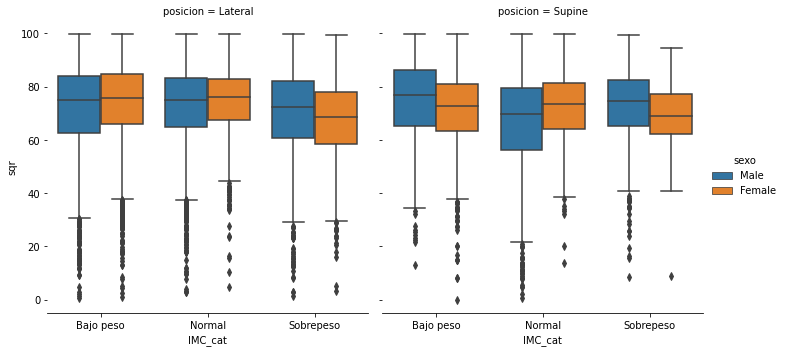

In [101]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="IMC_cat", y="sqr", hue="sexo", col="posicion",
#                 capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="box", data=perfiles_sqr)
g.despine(left=True);

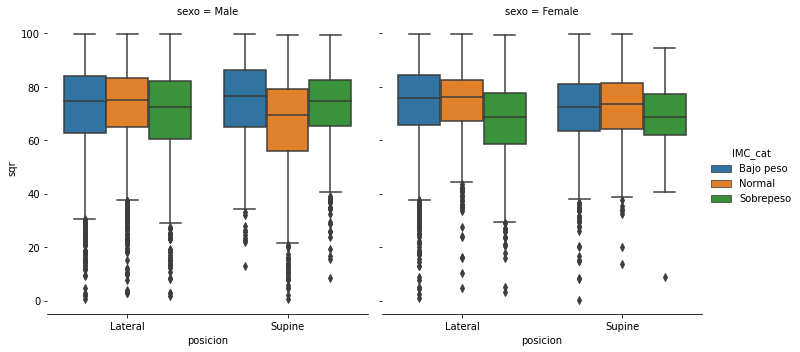

In [102]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="posicion", y="sqr", hue="IMC_cat", col="sexo",
#                 capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="box", data=perfiles_sqr)
g.despine(left=True);

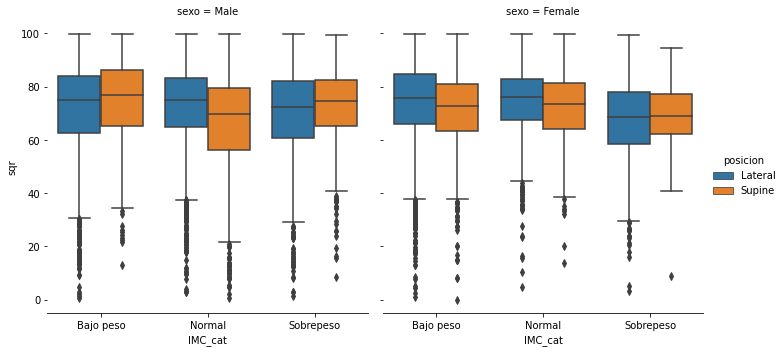

In [103]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="IMC_cat", y="sqr", hue="posicion", col="sexo",
#                 capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="box", data=perfiles_sqr)
g.despine(left=True);

## sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Bajo peso" 

### Descriptivo general

In [104]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Bajo peso"').describe().loc[:, 'sqr']

count    3048.000000
mean       71.771182
std        16.606458
min         0.548611
25%        62.615513
50%        74.829890
75%        84.027756
max        99.720833
Name: sqr, dtype: float64

### Presiones más comunes

In [105]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
022332,500.0,68.755963,17.688481,1.523611,58.921826,69.869393,82.052240,99.395833
022321,491.0,67.587098,14.431823,0.548611,59.562673,69.881590,77.807162,99.720833
122332,412.0,79.469806,14.648112,11.426219,74.109934,82.102524,90.058306,99.566667


### Top 3

In [106]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
355345,3.0,98.943519,0.433641,98.663889,98.693750,98.723611,99.083333,99.443056
122322,2.0,94.616432,3.805147,91.925787,93.271109,94.616432,95.961755,97.307078
022211,2.0,88.540704,15.318081,77.709185,83.124944,88.540704,93.956463,99.372222


### Bottom 3

In [107]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
011122,68.0,43.193508,16.305638,9.386739,32.416210,43.776949,54.985072,78.731718
000000,14.0,46.890536,17.915639,2.769516,38.255521,50.427682,55.527316,77.047024
023332,27.0,47.029459,14.448288,18.841904,38.195240,46.348785,56.536141,77.788625


## sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Normal" 

### Descriptivo general

In [108]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Normal"').describe().loc[:, 'sqr']

count    2919.000000
mean       72.514455
std        15.322795
min         2.775000
25%        64.850701
50%        75.023231
75%        83.118479
max        99.581944
Name: sqr, dtype: float64

### Presiones más comunes

In [109]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
023321,774.0,79.008010,11.160419,22.202053,72.792980,80.007170,86.791907,99.581944
123333,557.0,68.677976,18.330577,2.775000,59.138906,72.328519,80.985204,99.443056
023332,429.0,71.916016,13.856479,20.603976,64.841572,73.328035,81.934513,99.579167


### Top 3

In [110]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
022212,27.0,86.383393,6.939392,65.375475,83.337231,88.305550,90.475237,96.630614
423334,9.0,82.878618,8.388590,70.673799,76.372256,82.642373,89.236134,95.929722
123331,7.0,81.949426,14.934067,62.616938,71.165852,77.798068,96.105193,98.688889


### Bottom 3

In [111]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
233343,63.0,54.900271,22.174020,3.954167,37.082995,53.057372,67.897568,99.127912
021112,53.0,56.662330,17.812205,25.192097,41.689451,55.236771,72.603027,97.159721
122321,38.0,58.850495,13.393176,24.810632,49.412455,61.008785,67.709097,84.537289


## sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Sobrepeso" 

### Descriptivo general

In [112]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Sobrepeso"').describe().loc[:, 'sqr']

count    1486.000000
mean       69.934163
std        16.760021
min         1.523611
25%        60.534976
50%        72.356674
75%        82.086416
max        99.581944
Name: sqr, dtype: float64

### Presiones más comunes

In [113]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
233343,237.0,65.346307,19.450089,1.523611,54.180774,70.259246,79.595010,99.304167
233443,233.0,64.091652,13.937791,12.947659,56.741924,64.454098,72.519163,98.840278
123331,200.0,78.101647,15.739793,10.713383,71.349098,83.450177,89.325965,98.310590


### Top 3

In [114]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
123312,7.0,98.735353,1.008075,96.619691,98.606250,99.288889,99.328472,99.369444
123322,2.0,85.926034,2.260803,84.327405,85.126720,85.926034,86.725349,87.524664
023321,114.0,78.526914,10.528357,46.875897,72.009471,80.277012,86.221258,94.772958


### Bottom 3

In [115]:
perfiles_sqr.query('sexo == "Male" & posicion == "Lateral" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
111111,66.0,57.624983,18.780011,2.743056,52.913531,61.260336,68.883327,89.893734
555555,22.0,60.122970,16.141461,7.991667,53.345894,60.210352,67.628844,85.336986
123332,35.0,62.040203,11.745239,40.654735,53.720542,62.185670,68.391901,86.459574


## sexo == "Male" & posicion == "Supine" &  IMC_cat == "Bajo peso" 

### Descriptivo general

In [116]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Bajo peso"').describe().loc[:, 'sqr']

count    1738.000000
mean       74.836469
std        14.858761
min        12.957151
25%        65.123685
50%        76.695582
75%        86.143940
max        99.859722
Name: sqr, dtype: float64

### Presiones más comunes

In [117]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
122232,952.0,72.850052,15.538963,12.957151,62.062816,75.039031,84.944603,99.859722
122332,300.0,77.054723,12.771248,22.573749,69.589732,79.739718,86.650928,99.358333
122222,144.0,70.616770,12.874141,37.087762,61.905889,71.937355,78.920158,99.355556


### Top 3

In [118]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
344333,91.0,92.960823,7.456188,70.01073,89.523627,96.435707,98.692500,99.581944
555555,37.0,87.512646,7.350985,63.77181,86.084230,90.059779,91.947730,97.574410
333333,8.0,86.635611,6.910163,76.06107,80.174815,89.830629,91.787153,94.011412


### Bottom 3

In [119]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
223333,1.0,55.237353,NaN,55.237353,55.237353,55.237353,55.237353,55.237353
122322,2.0,60.427786,12.145227,51.839813,56.133800,60.427786,64.721772,69.015758
144332,8.0,64.315778,7.584656,54.099090,60.753604,65.345045,66.943916,78.066358


## sexo == "Male" & posicion == "Supine" &  IMC_cat == "Normal" 

### Descriptivo general

In [120]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Normal"').describe().loc[:, 'sqr']

count    1840.000000
mean       66.698176
std        17.237251
min         0.627778
25%        56.088519
50%        69.580258
75%        79.351870
max        99.566667
Name: sqr, dtype: float64

### Presiones más comunes

In [121]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
122322,547.0,66.366295,15.225245,7.734722,57.475569,66.963016,76.928260,99.373611
122332,356.0,57.800514,19.209305,0.627778,46.839251,57.409807,71.648875,99.258333
123322,173.0,69.852965,17.703565,11.037500,60.631773,74.389353,82.792162,94.987778


### Top 3

In [122]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
555555,3.0,99.430093,0.118864,99.350000,99.361806,99.373611,99.470139,99.566667
223332,64.0,81.516994,8.987806,59.643741,73.332463,83.318107,88.497528,97.082841
000333,7.0,80.263614,4.208739,72.065380,79.457860,79.589220,83.436795,84.401389


### Bottom 3

In [123]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
042233,1.0,39.203386,NaN,39.203386,39.203386,39.203386,39.203386,39.203386
534451,65.0,54.892497,20.227000,12.990278,39.838038,56.920281,68.667796,90.813911
122332,356.0,57.800514,19.209305,0.627778,46.839251,57.409807,71.648875,99.258333


## sexo == "Male" & posicion == "Supine" &  IMC_cat == "Sobrepeso" 

### Descriptivo general

In [124]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Sobrepeso"').describe().loc[:, 'sqr']

count    586.000000
mean      72.293000
std       14.744209
min        8.404418
25%       65.344102
50%       74.720501
75%       82.437363
max       99.366667
Name: sqr, dtype: float64

### Presiones más comunes

In [125]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
123322,190.0,80.376250,9.834691,29.466878,74.615520,80.607932,86.756831,99.361111
234443,89.0,69.789700,16.193379,15.471498,61.231682,70.138830,82.613158,99.361111
233333,72.0,69.906409,11.506310,36.989323,64.942973,70.177592,76.518389,99.366667


### Top 3

In [126]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
123222,15.0,83.911170,4.512664,69.932064,82.837917,85.390556,86.073889,89.052222
123322,190.0,80.376250,9.834691,29.466878,74.615520,80.607932,86.756831,99.361111
111111,21.0,76.015973,9.345006,55.004554,69.445805,77.632322,82.298731,94.448942


### Bottom 3

In [127]:
perfiles_sqr.query('sexo == "Male" & posicion == "Supine" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
042045,5.0,42.053327,13.017530,23.835269,35.109228,46.072304,47.238036,58.011800
000000,27.0,51.062649,16.445985,16.506944,39.722539,51.080762,61.604542,79.739695
233332,32.0,59.136388,17.821586,8.404418,49.685023,59.542491,71.061349,85.563349


## sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Bajo peso" 

### Descriptivo general

In [128]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Bajo peso"').describe().loc[:, 'sqr']

count    5352.000000
mean       74.265370
std        14.403450
min         1.005556
25%        65.789930
50%        75.754488
75%        84.571919
max        99.581944
Name: sqr, dtype: float64

### Presiones más comunes

In [129]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
012211,855.0,71.812514,15.270585,4.398611,63.892418,73.930400,82.593702,99.581944
022111,782.0,70.570939,13.006053,12.973611,62.232628,71.650193,79.310136,99.443056
012221,782.0,72.401021,15.529151,2.319444,64.129462,74.563672,83.651416,99.255278


### Top 3

In [130]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
444444,1.0,98.912500,NaN,98.912500,98.912500,98.912500,98.912500,98.912500
023112,195.0,91.387150,5.827397,68.866246,88.785037,92.060450,96.084397,99.581944
223344,20.0,88.395727,9.253263,73.468265,82.305827,91.631767,96.869849,99.559722


### Bottom 3

In [131]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
002211,20.0,57.626509,15.679430,23.816383,54.224105,61.726124,65.166779,87.228513
102012,13.0,57.684866,12.547863,39.306286,51.960726,56.827477,61.174012,84.924216
012321,10.0,59.548103,13.819782,44.858574,51.037445,56.436101,62.698804,87.190482


## sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Normal" 

### Descriptivo general

In [132]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Normal"').describe().loc[:, 'sqr']

count    1385.000000
mean       74.321461
std        12.997072
min         4.818056
25%        67.327403
50%        76.089397
75%        82.727658
max        99.581944
Name: sqr, dtype: float64

### Presiones más comunes

In [133]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
023211,427.0,70.924750,13.233570,4.818056,63.885609,72.619251,79.727996,96.499320
023321,374.0,76.172352,11.882101,27.574926,70.196544,77.765268,83.389075,99.581944
033211,107.0,67.899525,13.494126,10.426782,62.100416,69.531833,77.397553,90.475118


### Top 3

In [134]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
133321,1.0,99.341667,NaN,99.341667,99.341667,99.341667,99.341667,99.341667
033321,55.0,86.345876,7.948099,68.034344,81.491229,87.832939,93.028453,98.780556
234323,87.0,85.208007,7.119743,63.935503,79.863252,85.408333,91.358215,96.993056


### Bottom 3

In [135]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
023421,2.0,54.290896,16.624989,42.535253,48.413075,54.290896,60.168718,66.046539
012221,1.0,66.310188,NaN,66.310188,66.310188,66.310188,66.310188,66.310188
133431,20.0,67.616848,11.197572,47.190121,56.586364,71.647161,75.865437,83.295400


## sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Sobrepeso"

### Descriptivo general

In [136]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Sobrepeso"').describe().loc[:, 'sqr']

count    823.000000
mean      67.202523
std       14.708159
min        3.105556
25%       58.523265
50%       68.741594
75%       77.860535
max       99.373611
Name: sqr, dtype: float64

### Presiones más comunes

In [137]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
033211,148.0,67.518562,15.024616,3.105556,61.454052,70.554153,78.170098,90.959712
123211,145.0,63.076567,10.414173,32.284631,57.286803,63.581036,70.623377,85.734179
023321,117.0,76.638723,11.735495,27.000971,71.967563,78.780043,84.729410,97.705795


### Top 3

In [138]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
123212,9.0,91.035597,4.611725,83.726389,88.719444,90.414722,94.000623,98.661111
000000,1.0,85.158153,NaN,85.158153,85.158153,85.158153,85.158153,85.158153
023321,117.0,76.638723,11.735495,27.000971,71.967563,78.780043,84.729410,97.705795


### Bottom 3

In [139]:
perfiles_sqr.query('sexo == "Female" & posicion == "Lateral" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
335532,90.0,55.096396,13.987392,5.200000,48.342554,56.344713,65.196428,83.754913
234432,2.0,56.974393,15.166295,46.250203,51.612298,56.974393,62.336489,67.698584
133431,18.0,59.040619,22.821811,15.918097,39.846283,58.437991,78.561026,94.835976


## sexo == "Female" & posicion == "Supine" &  IMC_cat == "Bajo peso" 

### Descriptivo general

In [140]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Bajo peso"').describe().loc[:, 'sqr']

count    1667.000000
mean       71.440824
std        13.840424
min         0.018056
25%        63.280236
50%        72.582622
75%        80.925355
max        99.579167
Name: sqr, dtype: float64

### Presiones más comunes

In [141]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
122222,718.0,73.135706,12.915503,8.123101,65.490818,74.279545,81.109880,99.579167
122212,242.0,68.980732,17.571161,0.018056,57.996393,70.441421,81.772640,99.449897
122221,196.0,73.821876,13.646619,36.552826,64.976941,74.219906,86.331671,94.228060


### Top 3

In [142]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
000002,13.0,88.267170,3.990815,83.158636,85.208743,87.735229,88.811504,96.157703
120022,1.0,82.050531,NaN,82.050531,82.050531,82.050531,82.050531,82.050531
011111,6.0,79.930729,11.646328,67.800201,70.238883,78.196375,88.471098,95.909031


### Bottom 3

In [143]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Bajo peso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
030111,2.0,61.764576,0.922238,61.112455,61.438515,61.764576,62.090636,62.416697
133331,146.0,63.563648,12.265885,20.319017,57.142349,66.327698,71.479943,89.201937
022333,11.0,63.944567,15.475486,34.405716,55.533502,59.029448,75.143739,87.842524


## sexo == "Female" & posicion == "Supine" &  IMC_cat == "Normal" 

### Descriptivo general

In [144]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Normal"').describe().loc[:, 'sqr']

count    249.000000
mean      71.554839
std       14.674745
min       13.688456
25%       64.095786
50%       73.461908
75%       81.269218
max       99.581944
Name: sqr, dtype: float64

### Presiones más comunes

In [145]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
122322,160.0,74.324318,12.219852,35.271068,68.192011,76.194385,81.837022,99.372222
123222,47.0,59.623305,13.055323,19.984233,54.103008,60.543398,67.244949,91.848236
110302,17.0,78.030361,9.659903,62.603541,70.533691,74.636503,87.374612,95.406683


### Top 3

In [146]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
032325,6.0,89.069955,9.190642,75.882593,83.423652,89.745071,96.047670,99.581944
123322,9.0,80.371833,9.225623,64.408461,75.760904,81.073386,87.202370,92.389477
110302,17.0,78.030361,9.659903,62.603541,70.533691,74.636503,87.374612,95.406683


### Bottom 3

In [147]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Normal"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
111111,2.0,36.319524,32.005164,13.688456,25.003990,36.319524,47.635058,58.950592
122222,8.0,58.255891,21.157518,32.316601,39.133395,61.648634,71.443911,92.117263
123222,47.0,59.623305,13.055323,19.984233,54.103008,60.543398,67.244949,91.848236


## sexo == "Female" & posicion == "Supine" &  IMC_cat == "Sobrepeso" 

### Descriptivo general

In [148]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Sobrepeso"').describe().loc[:, 'sqr']

count    126.000000
mean      68.458304
std       11.975740
min        8.857392
25%       62.019204
50%       68.821838
75%       77.173356
max       94.566701
Name: sqr, dtype: float64

### Presiones más comunes

In [149]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='count', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
555555,65.0,64.910756,12.101932,8.857392,59.243803,67.240171,70.244786,91.708039
122322,16.0,77.713964,7.344180,63.200803,74.493330,78.403983,80.100366,94.566701
010022,13.0,74.271979,8.595320,61.010745,70.779447,73.335199,78.835115,90.861474


### Top 3

In [150]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=False).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
122322,16.0,77.713964,7.344180,63.200803,74.493330,78.403983,80.100366,94.566701
010022,13.0,74.271979,8.595320,61.010745,70.779447,73.335199,78.835115,90.861474
123332,12.0,71.953325,12.113963,51.649743,64.882543,70.731725,81.836748,89.806885


### Bottom 3

In [151]:
perfiles_sqr.query('sexo == "Female" & posicion == "Supine" &  IMC_cat == "Sobrepeso"').groupby('presiones').describe().loc[:, 'sqr'].sort_values(by='mean', ascending=True).head(3)

,count,mean,std,min,25%,50%,75%,max
presiones,,,,,,,,
010002,2.0,44.548415,2.801857,42.567202,43.557808,44.548415,45.539021,46.529627
555555,65.0,64.910756,12.101932,8.857392,59.243803,67.240171,70.244786,91.708039
012322,5.0,67.290420,8.985166,55.477026,62.498577,66.528542,73.849594,78.098359


In [152]:
#Guardar en HTML
!jupyter nbconvert sqr_categorias.ipynb --to html --log-level WARN